In [41]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [42]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merged_drug_time = merged_data_df.groupby(['Drug','Timepoint'])
mean_tumor_volume=merged_drug_time["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume_df=mean_tumor_volume.to_frame()

# Preview DataFrame
mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [43]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume=merged_drug_time["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tumor_volume_df=sem_tumor_volume.to_frame()

# Preview DataFrame
sem_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [44]:
# Minor Data Munging to Re-Format the Data Frames using unstack
mean_tumor_volume_df = mean_tumor_volume_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
mean_tumor_volume_df.columns = mean_tumor_volume_df.columns.get_level_values(1)
mean_tumor_volume_df = mean_tumor_volume_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
mean_tumor_volume_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [45]:
# Minor Data Munging to Re-Format the Data Frames using unstack and filling values of standard errors of tumor growth
sem_tumor_volume_df = sem_tumor_volume_df.unstack(level='Drug')

# Convert MultiIndex to single index to get desired drug columns
sem_tumor_volume_df.columns = sem_tumor_volume_df.columns.get_level_values(1)
sem_tumor_volume_df = sem_tumor_volume_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
sem_tumor_volume_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


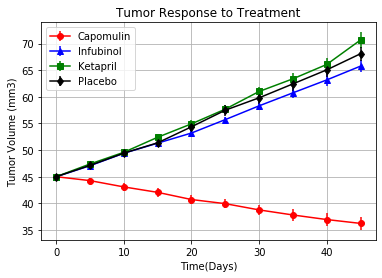

In [46]:
# Generate the Plot (with Error Bars)
# Generating the x_axis for scatter plot
x_axis=mean_tumor_volume_df.index

# Generating the mean and standard errors for Capomulin Drug
c_mean_axis=mean_tumor_volume_df['Capomulin'].values
c_sem_axis=sem_tumor_volume_df['Capomulin'].values

# Generating the mean and standard errors for Infubinol Drug
i_mean_axis=mean_tumor_volume_df['Infubinol'].values
i_sem_axis=sem_tumor_volume_df['Infubinol'].values

# Generating the mean and standard errors for Ketapril Drug
k_mean_axis=mean_tumor_volume_df['Ketapril'].values
k_sem_axis=sem_tumor_volume_df['Ketapril'].values

# Generating the mean and standard errors for Placebo Drug
p_mean_axis=mean_tumor_volume_df['Placebo'].values
p_sem_axis=sem_tumor_volume_df['Placebo'].values


# Setting up the error plot
fig, tumorx = plt.subplots()

tumorx.errorbar(x_axis,c_mean_axis, c_sem_axis, marker ='o', color='Red', label="Capomulin")
tumorx.errorbar(x_axis,i_mean_axis, i_sem_axis, marker ='^', color='Blue', label="Infubinol")
tumorx.errorbar(x_axis,k_mean_axis, k_sem_axis, marker ='s', color='Green', label="Ketapril")
tumorx.errorbar(x_axis,p_mean_axis, p_sem_axis, marker ='d', color='Black', label="Placebo")

# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("../Images/Tumor Response.png")

In [47]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [48]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta=merged_drug_time["Metastatic Sites"].mean()

# Convert to DataFrame
mean_meta_df=mean_meta.to_frame()

# Preview DataFrame
mean_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [49]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta=merged_drug_time["Metastatic Sites"].sem()

# Convert to DataFrame
sem_meta_df=sem_meta.to_frame()

# Preview DataFrame
sem_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [50]:
# Minor Data Munging to Re-Format the Data Frames using unstack
mean_meta_df = mean_meta_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
mean_meta_df.columns = mean_meta_df.columns.get_level_values(1)
mean_meta_df = mean_meta_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
mean_meta_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [51]:
# SEM Minor Data Munging to Re-Format the Data Frames
sem_meta_df= sem_meta_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
sem_meta_df.columns = sem_meta_df.columns.get_level_values(1)
sem_meta_df = sem_meta_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview that Reformatting worked
sem_meta_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


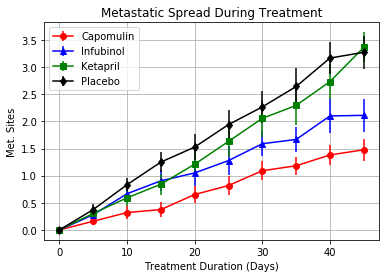

In [52]:
# Generate the Plot (with Error Bars)
x_meta_axis=mean_meta_df.index


# Generating the mean and standard errors for Capomulin Drug
c_mean_meta_axis=mean_meta_df['Capomulin'].values
c_sem_meta_axis=sem_meta_df['Capomulin'].values

# Generating the mean and standard errors for Infubinol Drug
i_mean_meta_axis=mean_meta_df['Infubinol'].values
i_sem_meta_axis=sem_meta_df['Infubinol'].values

# Generating the mean and standard errors for Ketapril Drug
k_mean_meta_axis=mean_meta_df['Ketapril'].values
k_sem_meta_axis=sem_meta_df['Ketapril'].values

# Generating the mean and standard errors for Placebo Drug
p_mean_meta_axis=mean_meta_df['Placebo'].values
p_sem_meta_axis=sem_meta_df['Placebo'].values


# Setting up the plot
fig, metax = plt.subplots()

metax.errorbar(x_axis,c_mean_meta_axis, c_sem_meta_axis, marker ='o', color='R', label="Capomulin")
metax.errorbar(x_axis,i_mean_meta_axis, i_sem_meta_axis, marker ='^', color='B', label="Infubinol")
metax.errorbar(x_axis,k_mean_meta_axis, k_sem_meta_axis, marker ='s', color='G', label="Ketapril")
metax.errorbar(x_axis,p_mean_meta_axis, p_sem_meta_axis, marker ='d', color='K', label="Placebo")

# Adds a legend and sets its location to the upper left
plt.legend(loc="upper left")

# Add Title and labels to the x and y axes
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("../Images/Metastatic response.png")

# Review the figure
plt.show()

## Survival Rates

In [53]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Generating a column of survival rates
survival_rate=(merged_drug_time["Mouse ID"].count()/25)*100

# Convert to DataFrame
survival_rate_df=survival_rate.to_frame()

# Preview DataFrame
survival_rate_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0             100.0
          5             100.0
          10            100.0
          15             96.0
          20             92.0

In [54]:
# Minor Data Munging to Re-Format the Data Frames
# transpose drug column into top row
survival_rate_df = survival_rate_df.unstack(level='Drug')

#Convert MultiIndex to single index to get desired drug columns
survival_rate_df.columns = survival_rate_df.columns.get_level_values(1)
survival_rate_df = survival_rate_df[['Capomulin','Infubinol','Ketapril','Placebo']]

# Preview the Data Frame
survival_rate_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


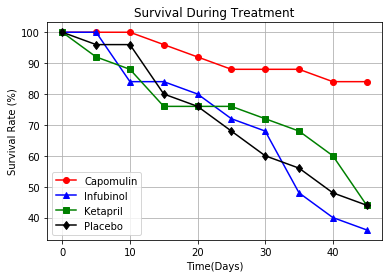

In [55]:
# Generate the Plot 
# Generate various axes of survival rate scatter plot
x_axis=survival_rate_df.index
c_sr_axis=survival_rate_df['Capomulin'].values
i_sr_axis=survival_rate_df['Infubinol'].values
k_sr_axis=survival_rate_df['Ketapril'].values
p_sr_axis=survival_rate_df['Placebo'].values

# Generate the line plots for various drugs
lineplot = plt.plot(x_axis, c_sr_axis, marker ='o', color='R', label="Capomulin")
lineplot = plt.plot(x_axis, i_sr_axis, marker ='^', color='B', label="Infubinol")
lineplot = plt.plot(x_axis, k_sr_axis, marker ='s', color='G', label="Ketapril")
lineplot = plt.plot(x_axis, p_sr_axis, marker ='d', color='K', label="Placebo")


# Adds a legend and sets its location to the upper left
plt.legend(loc="best")

# Add Title and labels to the x and y axes
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")

# Set a grid on the plot
plt.grid()

# Save the Figure
plt.savefig("../Images/Survival Response.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [56]:
# Calculate the percent changes for each drug
# Display the data to confirm
# Store all Relevant Percent Changes into a Tuple
volume_change= []
for i in mean_tumor_volume_df.columns:
    change= (((mean_tumor_volume_df.loc[45,i])-(mean_tumor_volume_df.loc[0,i]))/(mean_tumor_volume_df.loc[0,i]))*100
    volume_change.append(change)

print(volume_change)

[-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153]


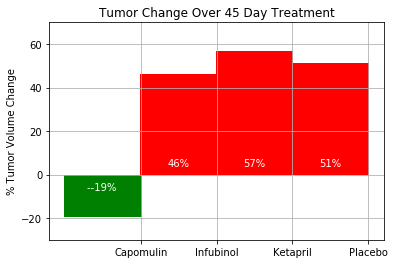

In [57]:
# Splice the data between passing and failing drugs

fig, barx = plt.subplots()
x_ind = np.arange(len(volume_change))  
barwidth = 1.02
rectsPass = barx.bar(x_ind[0], volume_change[0], barwidth, color='Green' )
rectsFail = barx.bar(x_ind[1:], volume_change[1:], barwidth, color='r')

# Adding titles, x ticks, and axes titles
barx.set_ylabel('% Tumor Volume Change')
barx.set_title('Tumor Change Over 45 Day Treatment')
barx.set_xticks(x_ind +.5)
barx.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
barx.set_autoscaley_on(False)
barx.set_ylim([-30,70])
barx.grid(True)


# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rec in rects:
        height = rec.get_height()
        barx.text(rec.get_x() + rec.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rec in rects:
        height = rec.get_height()
        barx.text(rec.get_x() + rec.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls

autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Save the Figure
plt.savefig("../Images/Percentage Tumor Volume Change.png")

# Show the Figure
fig.show()